# Part I: CNN

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# 1.Loading and understanding data

In [5]:
path1 = r'D:\Dataset\Flower species/flowers'
category = ['daisy','dandelion','rose','sunflower','tulip']  

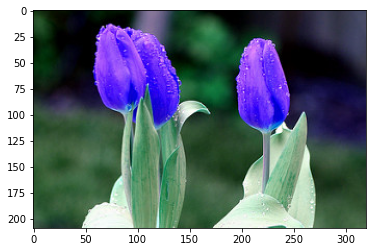

In [6]:
for i in category:
    folders = os.path.join(path1,i)  # to join path1 with categories
    for image in os.listdir(folders):
        image_path= os.path.join(folders,image)   # to join folders with images
        image_array=cv2.imread(image_path)        # to convert jpg images into array
        plt.imshow(image_array)                   # to show images
        break

In [7]:
# Here default image size is 210*300

In [8]:
image_size=128
input_image=[]
for i in category:
    folders = os.path.join(path1,i)
    label=category.index(i)
    print('value of label is ',label)
    for image in os.listdir(folders):
        image_path= os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))  # here we reized image to 128*128
        input_image.append([image_array,label])

value of label is  0
value of label is  1
value of label is  2
value of label is  3
value of label is  4


In [9]:
len(input_image)

4317

In [10]:
np.random.shuffle(input_image)  # here we shuffle flowers images to avoid sequence bias

In [11]:
# now we need to separate x,y to build model
X=[]
Y=[]
for x_values,labels in input_image:
    X.append(x_values)
    Y.append(labels)

In [12]:
X

[array([[[182, 171, 151],
         [183, 172, 152],
         [183, 172, 152],
         ...,
         [163, 147, 123],
         [162, 145, 123],
         [161, 143, 122]],
 
        [[183, 172, 152],
         [183, 172, 152],
         [184, 173, 153],
         ...,
         [164, 148, 126],
         [162, 145, 124],
         [161, 145, 122]],
 
        [[184, 173, 153],
         [184, 173, 153],
         [184, 173, 153],
         ...,
         [162, 148, 125],
         [163, 146, 125],
         [163, 146, 125]],
 
        ...,
 
        [[214, 240, 254],
         [212, 239, 253],
         [210, 238, 253],
         ...,
         [163, 179, 186],
         [162, 177, 186],
         [162, 175, 183]],
 
        [[166, 192, 204],
         [213, 239, 254],
         [214, 239, 255],
         ...,
         [162, 176, 183],
         [162, 175, 183],
         [160, 173, 181]],
 
        [[213, 241, 255],
         [214, 240, 254],
         [209, 240, 255],
         ...,
         [161, 174, 182],
  

In [13]:
Y

[3,
 3,
 4,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 4,
 2,
 4,
 3,
 0,
 1,
 3,
 4,
 4,
 0,
 1,
 0,
 2,
 1,
 3,
 2,
 0,
 2,
 3,
 0,
 3,
 4,
 1,
 3,
 2,
 0,
 3,
 4,
 2,
 3,
 1,
 3,
 4,
 4,
 1,
 4,
 1,
 4,
 2,
 3,
 0,
 4,
 0,
 2,
 3,
 1,
 2,
 4,
 0,
 0,
 2,
 0,
 4,
 0,
 3,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 4,
 1,
 1,
 0,
 4,
 2,
 4,
 1,
 3,
 4,
 4,
 4,
 0,
 1,
 0,
 1,
 4,
 3,
 0,
 1,
 3,
 2,
 1,
 4,
 0,
 3,
 4,
 1,
 2,
 1,
 3,
 0,
 4,
 3,
 2,
 2,
 4,
 2,
 0,
 0,
 0,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 2,
 4,
 3,
 3,
 1,
 0,
 1,
 4,
 0,
 4,
 4,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 2,
 1,
 4,
 3,
 0,
 2,
 3,
 1,
 1,
 0,
 2,
 1,
 2,
 3,
 3,
 1,
 0,
 0,
 4,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 2,
 4,
 0,
 3,
 0,
 3,
 3,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 3,
 3,
 1,
 4,
 2,
 4,
 1,
 1,
 1,
 2,
 4,
 1,
 2,
 2,
 2,
 1,
 3,
 0,
 3,
 3,
 4,
 0,
 0,
 0,
 0,
 3,
 1,
 3,
 1,
 2,
 4,
 0,
 3,
 3,
 0,
 3,
 2,
 0,
 1,
 1,
 4,
 4,
 2,
 3,
 3,


In [14]:
X=np.array(X)
Y=np.array(Y)

In [15]:
X.shape # here 3 is for color images, it is a dimension.

(4317, 128, 128, 3)

In [16]:
Y

array([3, 3, 4, ..., 2, 3, 3])

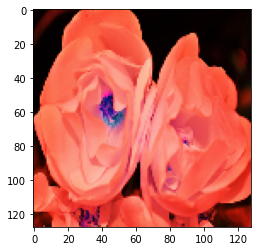

In [17]:
plt.imshow(X[73])  # image size changed to 128*128

[ 620 1124 3213  822 1542 4300 3784 2580 1921 3135]


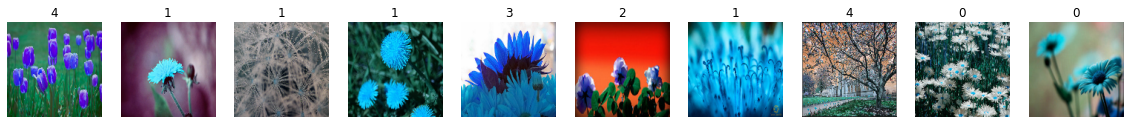

In [18]:
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  
    plt.title("{}".format(Y[j]))
    plt.axis('off')
plt.show()

# 2.Data Preparation

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2)
print(len(X_train))
print(len(X_val))

3453
864


In [20]:
## One hot encode the target variable
y_train = pd.get_dummies(y_train).values
y_val = pd.get_dummies(y_val).values

## Convert data from list to array
X_train = np.array(X_train)
X_val = np.array(X_val)

In [21]:
## Normalization
X_train = X_train / 255.   
X_val = X_val / 255.

In [22]:
## Check the min and max values after normalization
print('Train data------------','max:',X_train.max(), 'min:',X_train.min())
print('Validation data-------','max:',X_val.max(), 'min:',X_val.min())

Train data------------ max: 1.0 min: 0.0
Validation data------- max: 1.0 min: 0.0


In [23]:
# DATA SET SHAPE AND SIZE
print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN
print('\nValidation data : ', X_val.shape, y_val.shape)       # Validation


Training data :  (3453, 128, 128, 3) (3453, 5)

Validation data :  (864, 128, 128, 3) (864, 5)


# 3.Train,tune,test and compare Deep Learning classifier model :

In [24]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# Adding another pooling layer
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
# Adding another pooling layer
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))
# Adding dropout with probability 0.4
classifier.add(Dropout(0.4))

# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 5 neuron to predict the categorical classification
classifier.add(Dense(units = 5, activation = 'softmax'))

In [25]:
## Complie the model and get the summary of the model architecture
opt = Adam()
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [76]:
## Fit the model
cnn_model_1 = classifier.fit(X_train, y_train, epochs = 10,validation_data = (X_val, y_val), initial_epoch=0)

Epoch 1/10
108/108 [==============================] - 90s 777ms/step - loss: 1.3591 - accuracy: 0.3942 - val_loss: 1.1230 - val_accuracy: 0.5208
Epoch 2/10
108/108 [==============================] - 83s 769ms/step - loss: 1.0743 - accuracy: 0.5725 - val_loss: 1.0222 - val_accuracy: 0.6042
Epoch 3/10
108/108 [==============================] - 86s 795ms/step - loss: 0.9327 - accuracy: 0.6365 - val_loss: 0.9585 - val_accuracy: 0.6273
Epoch 4/10
108/108 [==============================] - 83s 767ms/step - loss: 0.7788 - accuracy: 0.6991 - val_loss: 0.9102 - val_accuracy: 0.6435
Epoch 5/10
108/108 [==============================] - 84s 776ms/step - loss: 0.6621 - accuracy: 0.7498 - val_loss: 0.9437 - val_accuracy: 0.6562
Epoch 6/10
108/108 [==============================] - 84s 779ms/step - loss: 0.4928 - accuracy: 0.8233 - val_loss: 0.9717 - val_accuracy: 0.6667
Epoch 7/10
108/108 [==============================] - 86s 794ms/step - loss: 0.3506 - accuracy: 0.8697 - val_loss: 1.1090 - val_ac

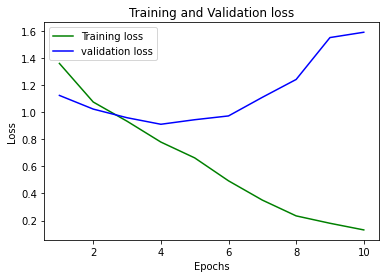

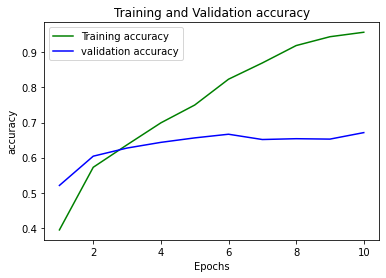

In [77]:
# Accuracy and Loss plots 

EPOCH=10
epochs = range(1,EPOCH+1)

loss_train = cnn_model_1.history['loss']
loss_val = cnn_model_1.history['val_loss']
Acc_train = cnn_model_1.history['accuracy']
Acc_val = cnn_model_1.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Here as we increse epochs training loss decreses but validation loss increses and model is overfitting.
# So we will tune hyperparameters properly in next model.

In [24]:
# model architecture building

Classifier_2 = Sequential()

Classifier_2.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.3))

Classifier_2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.5))


Classifier_2.add(Flatten())

# fully connected layer
Classifier_2.add(Dense(128, activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(Dropout(0.5))

# Classification layer
Classifier_2.add(Dense(units=5, activation='softmax'))   

In [25]:
## Complie the model and get the summary of the model architecture
opt = Adam()
Classifier_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
Classifier_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                        

In [ ]:
## Fit the model
cnn_model_2 = Classifier_2.fit(X_train, y_train, epochs = 15, validation_data = (X_val, y_val), initial_epoch=0) 

Epoch 1/15
108/108 [==============================] - 459s 4s/step - loss: 1.3964 - accuracy: 0.4726 - val_loss: 2.6900 - val_accuracy: 0.2604
Epoch 2/15
 39/108 [=========>....................] - ETA: 9:15 - loss: 1.2730 - accuracy: 0.5232

In [26]:
cnn_model_2 = Classifier_2.fit(X_train, y_train, epochs = 15, validation_data = (X_val, y_val), initial_epoch=0)

Epoch 1/15
108/108 [==============================] - 368s 3s/step - loss: 1.5989 - accuracy: 0.4275 - val_loss: 3.0868 - val_accuracy: 0.2442
Epoch 2/15
108/108 [==============================] - 344s 3s/step - loss: 1.2651 - accuracy: 0.5355 - val_loss: 2.5379 - val_accuracy: 0.2535
Epoch 3/15
108/108 [==============================] - 361s 3s/step - loss: 1.1068 - accuracy: 0.5752 - val_loss: 1.9343 - val_accuracy: 0.3657
Epoch 4/15
108/108 [==============================] - 352s 3s/step - loss: 1.0113 - accuracy: 0.6183 - val_loss: 1.6286 - val_accuracy: 0.3889
Epoch 5/15
108/108 [==============================] - 359s 3s/step - loss: 0.8317 - accuracy: 0.6797 - val_loss: 1.1218 - val_accuracy: 0.5856
Epoch 6/15
108/108 [==============================] - 358s 3s/step - loss: 0.7039 - accuracy: 0.7388 - val_loss: 1.0353 - val_accuracy: 0.6042
Epoch 7/15
108/108 [==============================] - 362s 3s/step - loss: 0.5967 - accuracy: 0.7773 - val_loss: 0.9447 - val_accuracy: 0.6539

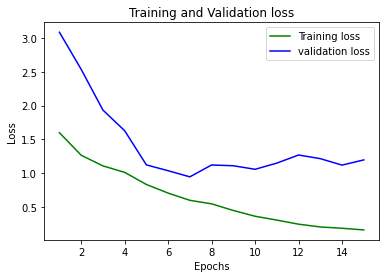

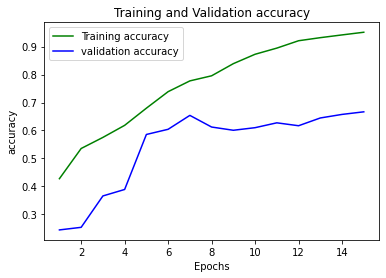

In [27]:
# Accuracy and Loss plots 

EPOCH=15
epochs = range(1,EPOCH+1)

loss_train = cnn_model_2.history['loss']
loss_val = cnn_model_2.history['val_loss']
Acc_train = cnn_model_2.history['accuracy']
Acc_val = cnn_model_2.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
# As we increse epochs training and validation accuracy increses and loss decreses.
# We get almost 95 % training and validation accuracy.
# Hence our model gets converged and we obtained best CNN model.

In [47]:
pred_values = Classifier_2.predict(X)

135/135 [==============================] - 86s 634ms/step


In [48]:
pred_values  # thses are probability values, bcoz softmax gives probabilities, we need to convert thses into classs

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.7633792e-19,
        0.0000000e+00]], dtype=float32)

In [49]:
pred_classes = np.argmax(pred_values,axis=1)

In [50]:
pred_classes

array([3, 3, 0, ..., 0, 3, 0], dtype=int64)

In [51]:
len(pred_classes)

4317

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
conf_mat = confusion_matrix(Y,pred_classes)
conf_mat

array([[651,   0,   0, 113,   0],
       [500,   0,   0, 552,   0],
       [589,   0,  29, 149,  17],
       [ 58,   0,   0, 675,   0],
       [537,   0,   2, 403,  42]], dtype=int64)

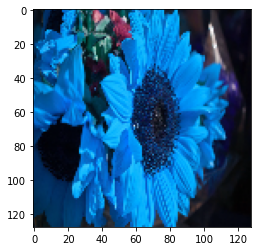

1/1 [==============================] - 0s 35ms/step
sunflower


In [79]:
# Prediction on test image :
abc = random.randint(0,len(Y))
plt.imshow(X[abc,:])
plt.show()

y_pred = Classifier_2.predict(X[abc,:].reshape(1,128,128,3))
y_pred = np.argmax(y_pred)
if y_pred == 0:
    print('daisy')
elif y_pred==1:
    print('dandelion')
elif y_pred==2:
    print('rose')
elif y_pred==3:
    print('sunflower')
else:
    print('tulip')

In [80]:
# Hence we made prediction on test image !

# Part II: NLP

In [81]:
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [82]:
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

In [83]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [84]:
df = df.drop(['article_link'], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [85]:
df.shape

(26709, 2)

In [86]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [87]:
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [88]:
df.headline = df.headline.str.lower()  # headline in lower case

In [89]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
df_train,df_test = train_test_split(df,test_size=.2)

In [92]:
df_train_x = df_train.iloc[:,0]
df_train_y = df_train.iloc[:,1]

In [93]:
df_test_x = df_test.iloc[:,0]
df_test_y = df_test.iloc[:,1]

In [94]:
df_train_y = to_categorical(df_train_y)

In [95]:
# hyperparameter

max_num_words = 15000

seq_len = 50

embedding_size = 100

In [96]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [97]:
tokenizer = Tokenizer(num_words=max_num_words)

In [98]:
tokenizer.fit_on_texts(df.headline)
df_train_x= tokenizer.texts_to_sequences(df_train_x)
df_train_x = pad_sequences(df_train_x,maxlen=seq_len)

In [99]:
tokenizer.fit_on_texts(df.headline)
df_test_x= tokenizer.texts_to_sequences(df_test_x)
df_test_x = pad_sequences(df_test_x,maxlen=seq_len) 

In [100]:
model = Sequential()
model.add(Embedding(input_dim=max_num_words,   # bcoz on those words we are building model
                   input_length=seq_len,
                   output_dim=embedding_size))
model.add(LSTM(4))
model.add(Dense(2,activation='softmax'))     # no of neurons in o/p layer = no of classes(2) 

adam = Adam(learning_rate=0.003)

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [101]:
model.fit(df_train_x, df_train_y, epochs=8,validation_split=0.2)

Epoch 1/8
535/535 [==============================] - 31s 34ms/step - loss: 0.1477 - accuracy: 0.7832 - val_loss: 0.1109 - val_accuracy: 0.8453
Epoch 2/8
535/535 [==============================] - 18s 33ms/step - loss: 0.0626 - accuracy: 0.9190 - val_loss: 0.1160 - val_accuracy: 0.8402
Epoch 3/8
535/535 [==============================] - 18s 33ms/step - loss: 0.0341 - accuracy: 0.9590 - val_loss: 0.1253 - val_accuracy: 0.8322
Epoch 4/8
535/535 [==============================] - 18s 34ms/step - loss: 0.0211 - accuracy: 0.9754 - val_loss: 0.1325 - val_accuracy: 0.8355
Epoch 5/8
535/535 [==============================] - 18s 33ms/step - loss: 0.0143 - accuracy: 0.9836 - val_loss: 0.1337 - val_accuracy: 0.8334
Epoch 6/8
535/535 [==============================] - 18s 33ms/step - loss: 0.0100 - accuracy: 0.9887 - val_loss: 0.1400 - val_accuracy: 0.8299
Epoch 7/8
535/535 [==============================] - 18s 33ms/step - loss: 0.0079 - accuracy: 0.9918 - val_loss: 0.1452 - val_accuracy: 0.8287

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1500000   
                                                                 
 lstm (LSTM)                 (None, 4)                 1680      
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1501690 (5.73 MB)
Trainable params: 1501690 (5.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
pred_values = model.predict(df_test_x)

167/167 [==============================] - 1s 4ms/step


In [104]:
pred_values

array([[9.9866223e-01, 1.3377673e-03],
       [9.9796557e-01, 2.0344704e-03],
       [9.9812192e-01, 1.8780850e-03],
       ...,
       [2.9229641e-01, 7.0770359e-01],
       [9.9928647e-01, 7.1353215e-04],
       [9.9823487e-01, 1.7650989e-03]], dtype=float32)

In [105]:
pred_classes = np.argmax(pred_values,axis=1)

In [106]:
pred_classes

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [108]:
conf_mat = confusion_matrix(df_test_y,pred_classes)
conf_mat

array([[2546,  401],
       [ 448, 1947]], dtype=int64)

In [111]:
print('accuracy=',accuracy_score(df_test_y,pred_classes)*100)

accuracy= 84.10707600149757
